<a href="https://colab.research.google.com/github/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/blob/Young%2FLSTM/Pytorch_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LSTM Introduction**

Long Short-Term Memory (LSTM) are a kind of Recurrent Neural Network. It is designed to model temporal sequences and its performance is better than conventional RNNs in long range dependencies. The gates are used in LSTM that regulate information flow through the unit. This method solve the vanishing gradient problem in a long sequence. LSTMs are well-suited for tasks where context and the sequence of the text are important, Such as Natural Language Processing (NLP) tasks. Exactly suit for this COVID-19 Sentiment Analysis task.

**Sentiment Analysis**

Sentiment analysis involves determining the sentiment or emotion behind the sentences. It is commonly utilized for analyse opiniona in social media platform, reviews, and other text-based data sources to help making decisions and promotions by understanding the true ideas about products, services from the public. In this task, it aims to understand the public sentiment about the COVID-19 pandemic.

**LSTM Sentiment Analysis**

Sentiment analysis involves understanding the context within sentences or any other series words. LSTMs can handle these sequential text data without missing the order and major information. Also it could solve the dependencies of a long distance text. Due to the traditional RNNs are struggled with vanishing gradient issues. LSTMs can address this kind of problem with their memory cell structure, allow to maintian information for long periods.
LSTMs can handle varying lengths of input text, it can be used in various kind of text data, from short tweets to long reviews and the complex sentences with multiple clauses and nuanced meanings can be better captured.

**Architecture of LSTM Model for Sentiment Analysis**

1. Embedded layer:
*   Purpose:converts words into dense vector representation, it can capture semantic meanings of words in a lower-dimentinal space.
*   Input: Sequences of intergers (tokenized text)
*   output: Dense vectors of dixed size for each word.

2. LSTM layer:
*   Purpose: also is the core layer of LSTM network, processing the suquences and captures dependencies, the performance can be optimized by increasing the LSTM layers stack. This layer contains the memory cells and gates.
*   Input: Enbeddings from the pervious layer.
*   output: A sequence of hidden states, with each state capturing information drom the previous words in the sequence.

3. Dense layer:
*   Purpose: also known as fully connected layer, which help in making prediciton. The appropriate activation function for three classes(positive, negative, neutral) in this case is the softmax function.
*   Input: The final hidden state or the output from the LSTM layer.
*   output: A vector with a length =




# Preprocess

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti.csv'
url_A = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-A.csv'
url_B = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-B.csv'
url_C = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-C.csv'

original_df = pd.read_csv(url)
original_df_A = pd.read_csv(url_A)
original_df_B = pd.read_csv(url_B)
original_df_C = pd.read_csv(url_C)
# Preparing / Initialization for preprocessed dataset
df = pd.read_csv(url)
df_A = pd.read_csv(url_A)
df_B = pd.read_csv(url_B)
df_C = pd.read_csv(url_C)

print(original_df.info())
print(original_df['label'].value_counts())
print(original_df.head())

print("-------------------------------------------------------------------------")
print(original_df_A.info())
print(original_df_A['label'].value_counts())
print(original_df_A.head())

print("-------------------------------------------------------------------------")
print(original_df_B.info())
print(original_df_B['label'].value_counts())
print(original_df_B.head())

print("-------------------------------------------------------------------------")
print(original_df_C.info())
print(original_df_C['label'].value_counts())
print(original_df_C.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   90000 non-null  object
 1   label   90000 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB
None
label
neu    67385
neg    16335
pos     6280
Name: count, dtype: int64
                                               tweet label
0  Coronavirus | Human Coronavirus Types | CDC ht...   neu
1  @shehryar_taseer That‚Äôs üíØ true , \nCorona...   neu
2  TLDR: Not SARS, possibly new coronavirus. Diff...   neg
3  Disease outbreak news from the WHO: Middle Eas...   neu
4  China - Media: WSJ says sources tell them myst...   neu
-------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   30000 non-n

In [ ]:
# @title #### 3.4.1 **Lowercase Conversion**:
df['tweet'] = original_df['tweet'].str.lower()
df_A['tweet'] = original_df_A['tweet'].str.lower()
df_B['tweet'] = original_df_B['tweet'].str.lower()
df_C['tweet'] = original_df_C['tweet'].str.lower()
print(original_df.iloc[0, 0])
print(df.iloc[0, 0])

Coronavirus | Human Coronavirus Types | CDC https://t.co/IxoxVRarIb
coronavirus | human coronavirus types | cdc https://t.co/ixoxvrarib


In [ ]:

# @title #### 3.4.2 **Removing URLs**:
def remove_urls(text):
    # Match URLs starting with "http://", "https://", or "www.".
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['tweet'] = df['tweet'].apply(lambda x: remove_urls(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_urls(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_urls(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_urls(x))
print(original_df.iloc[0, 0])
print(df.iloc[0, 0])

Coronavirus | Human Coronavirus Types | CDC https://t.co/IxoxVRarIb
coronavirus | human coronavirus types | cdc 


In [ ]:
# @title #### 3.4.3 **Removing mentions and hashtags**:
def remove_mentions_hashtags(text):
    mention_pattern = re.compile(r'@\w+')
    hashtag_pattern = re.compile(r'#\w+')
    text = mention_pattern.sub(r'', text)
    text = hashtag_pattern.sub(r'', text)
    return text

df['tweet'] = df['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_mentions_hashtags(x))
print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])

@shehryar_taseer That‚Äôs üíØ true , 
Corona virus 
swine flue 
Bird flu in December when whole Pk is busy in Marriage‚Ä¶ https://t.co/6JWBIymnyo
------------------------------------------------------------------------
 that‚äôs üíø true , 
corona virus 
swine flue 
bird flu in december when whole pk is busy in marriage‚ä¶ 


In [ ]:

# @title #### 3.4.4 Remove special characters and punctuation
def remove_special_characters(text):
    special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')
    text = special_char_pattern.sub(r'', text)
    return text

df['tweet'] = df['tweet'].apply(lambda x: remove_special_characters(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_special_characters(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_special_characters(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_special_characters(x))

print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])


@shehryar_taseer That‚Äôs üíØ true , 
Corona virus 
swine flue 
Bird flu in December when whole Pk is busy in Marriage‚Ä¶ https://t.co/6JWBIymnyo
------------------------------------------------------------------------
 thats  true  
corona virus 
swine flue 
bird flu in december when whole pk is busy in marriage 


In [ ]:

# @title #### 3.4.5 Removing Stop Words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download the stop words corpus

# Remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

df['tweet'] = df['tweet'].apply(remove_stopwords)
df_A['tweet'] = df_A['tweet'].apply(remove_stopwords)
df_B['tweet'] = df_B['tweet'].apply(remove_stopwords)
df_C['tweet'] = df_C['tweet'].apply(remove_stopwords)

print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


@shehryar_taseer That‚Äôs üíØ true , 
Corona virus 
swine flue 
Bird flu in December when whole Pk is busy in Marriage‚Ä¶ https://t.co/6JWBIymnyo
------------------------------------------------------------------------
thats true corona virus swine flue bird flu december whole pk busy marriage


## Tokenization with NLTK
Tokenize the cleaned tweets into individual words

step 1: Tokenize the text data with nltk.

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize the texts
df['tweet'] = df['tweet'].apply(lambda x: word_tokenize(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: word_tokenize(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: word_tokenize(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: word_tokenize(x))

print(df['tweet'].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        [coronavirus, human, coronavirus, types, cdc]
1    [thats, true, corona, virus, swine, flue, bird...
2    [tldr, sars, possibly, new, coronavirus, diffi...
3    [disease, outbreak, news, middle, east, respir...
4    [china, media, wsj, says, sources, tell, myste...
Name: tweet, dtype: object


Step 2: Convert Tokens to Sequences

Create a vocabulary from the tokenized texts and convert the tokens to sequences of integers.

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import Dataset, DataLoader
import torch


# Combine all datasets into one list of tokenized texts
all_texts = df['tweet'].tolist() + df_A['tweet'].tolist() + df_B['tweet'].tolist() + df_C['tweet'].tolist()

# Create and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([' '.join(text) for text in all_texts])

# Convert the tokenized texts to sequences of integers
df['tweet'] = df['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_A['tweet'] = df_A['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_B['tweet'] = df_B['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_C['tweet'] = df_C['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])



Step 3: Pad the Sequences

Pad the sequences so that they all have the same length.

In [ ]:
max_length = max(max(len(seq) for seq in df['tweet']),
                 max(len(seq) for seq in df_A['tweet']),
                 max(len(seq) for seq in df_B['tweet']),
                 max(len(seq) for seq in df_C['tweet']))

# Pad the sequences
df['tweet'] = pad_sequences(df['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_A['tweet'] = pad_sequences(df_A['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_B['tweet'] = pad_sequences(df_B['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_C['tweet'] = pad_sequences(df_C['tweet'].tolist(), maxlen=max_length, padding='post').tolist()

print(df['tweet'].head())

0    [1, 382, 1, 2558, 69, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [135, 508, 3, 2, 1736, 9462, 2195, 41, 2302, 3...
2    [9463, 240, 1321, 8, 1, 2386, 746, 102, 1059, ...
3    [93, 10, 13, 957, 810, 1166, 2303, 1, 9464, 33...
4    [4, 104, 2607, 20, 1286, 272, 3169, 861, 8, 1,...
Name: tweet, dtype: object


The tokenizer class has concerted words into unique integers besed on their frequency in the corpos. The most frequent word gets the smallest integer, and so on.
The sequences have been padded to ensure they are all of the same length.

In [ ]:
# Verify the result by mapping back to words
i = 0  # Example index
tokenized_sequence = df.iloc[i, 0]
mapped_words = [tokenizer.index_word[token] for token in tokenized_sequence if token != 0]
print(f"Original Text {i}: {' '.join(all_texts[i])}")
print(f"Tokenized Sequence {i}: {tokenized_sequence}")
print(f"Mapped Words {i}: {' '.join(mapped_words)}")

Original Text 0: coronavirus human coronavirus types cdc
Tokenized Sequence 0: [1, 382, 1, 2558, 69, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Mapped Words 0: coronavirus human coronavirus types cdc


## GloVe Embedding

Create an embedding matrix where each row corresponds to a word in tokenizer’s vocabulary.

In [ ]:
import numpy as np

# Load GloVe embeddings
embedding_index = {}
with open("drive/MyDrive/Jialiang/9444/COVID19/glove/glove.6B.100d.txt", "r", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coefs

# Create embedding matrix
embedding_dim = 100  # Size of GloVe embeddings
word_index = tokenizer.word_index  # Assuming tokenizer is already fitted
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Convert to PyTorch tensor
embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float32)

## Train-Val-Test split

In [ ]:
from sklearn.model_selection import train_test_split

# Combine all data into a single DataFrame
all_data = pd.concat([df, df_A, df_B, df_C], ignore_index=True)

# Prepare labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
all_data['label'] = label_encoder.fit_transform(all_data['label'])
labels = all_data['label'].values

# Convert sequences to numpy array
sequences = np.array(all_data['tweet'].tolist())

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(sequences, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initiate Dataset

In [ ]:
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.tensor(self.sequences[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

# Create datasets
train_dataset = TextDataset(X_train, y_train)
val_dataset = TextDataset(X_val, y_val)
test_dataset = TextDataset(X_test, y_test)

# batch_size = 32
batch_size = 64

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Previous nn.LSTM Model and Training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class LSTM_model(nn.Module):
    def __init__(self, embedding_matrix, num_hid, num_out, batch_size=1, num_layers=1):
        super().__init__()
        self.num_hid = num_hid
        self.batch_size = batch_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix, freeze=False)
        self.lstm = nn.LSTM(embedding_matrix.shape[1], num_hid, num_layers, batch_first=True)
        self.fc = nn.Linear(num_hid, num_out)
        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.num_hid)
        for weight in self.parameters():
            if weight.dim() > 1:
                nn.init.xavier_uniform_(weight)
            else:
                nn.init.uniform_(weight, -stdv, stdv)

    def forward(self, x):
        x = self.embedding(x)
        h0 = torch.zeros(self.num_layers, x.size(0), self.num_hid).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.num_hid).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Model parameters
# num_hid = 128
num_hid = 256
num_out = 3
learning_rate = 0.0015
num_epochs = 10

# Instantiate model, loss function, and optimizer
model = LSTM_model(embedding_matrix, num_hid, num_out, num_layers=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")


Epoch [1/10], Train Loss: 0.7145, Val Loss: 0.7247, Train Acc: 74.94, Val Acc: 74.27
Epoch [2/10], Train Loss: 0.7108, Val Loss: 0.7256, Train Acc: 74.97, Val Acc: 74.27
Epoch [3/10], Train Loss: 0.7111, Val Loss: 0.7273, Train Acc: 74.97, Val Acc: 74.27
Epoch [4/10], Train Loss: 0.5301, Val Loss: 0.3351, Train Acc: 82.01, Val Acc: 89.12
Epoch [5/10], Train Loss: 0.2429, Val Loss: 0.2138, Train Acc: 92.12, Val Acc: 93.53
Epoch [6/10], Train Loss: 0.1301, Val Loss: 0.1786, Train Acc: 96.12, Val Acc: 94.79
Epoch [7/10], Train Loss: 0.0770, Val Loss: 0.1594, Train Acc: 97.75, Val Acc: 95.69
Epoch [8/10], Train Loss: 0.0487, Val Loss: 0.1522, Train Acc: 98.63, Val Acc: 96.38
Epoch [9/10], Train Loss: 0.0339, Val Loss: 0.1633, Train Acc: 99.04, Val Acc: 96.57
Epoch [10/10], Train Loss: 0.0235, Val Loss: 0.1797, Train Acc: 99.35, Val Acc: 96.58
Training complete


## Results Visualization

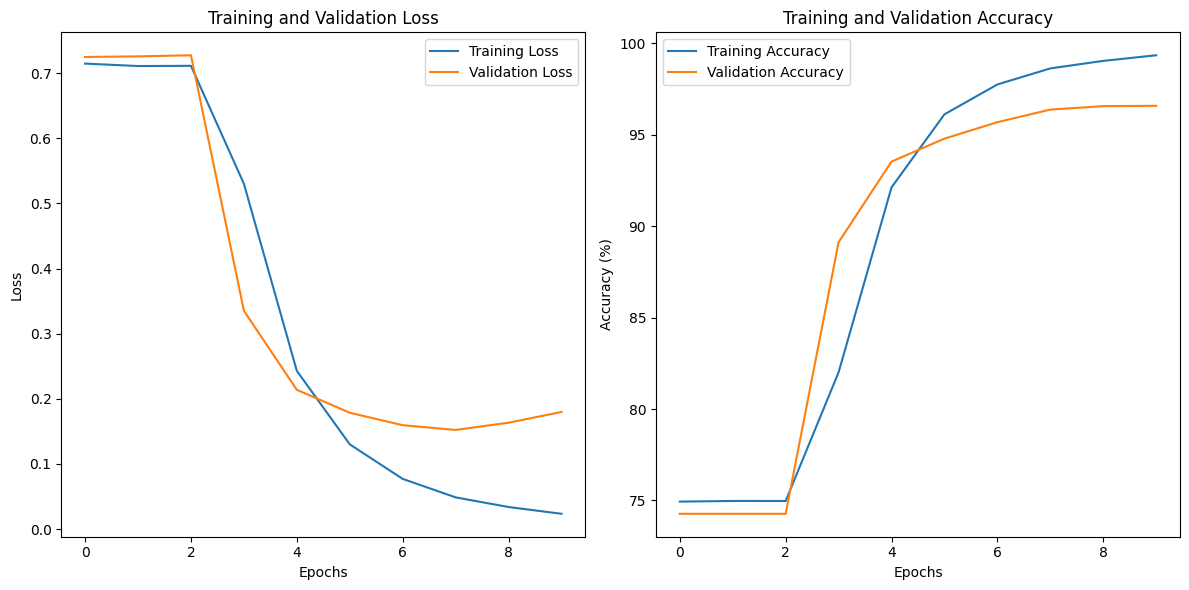

In [ ]:

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

## Evaluate Results of Test Set
(include learning curves & confusion matrix)

Accuracy: 0.9664
Precision: 0.9664
Recall: 0.9664
F1 Score: 0.9663


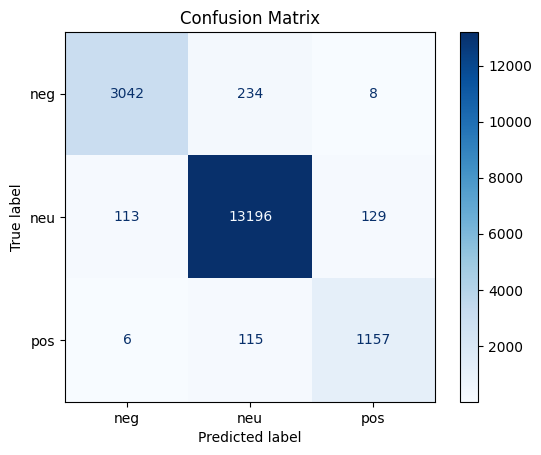

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Make predictions
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# **Customised LSTM Model and Training**

## **Hyperparameters to be considered**


*   Learning Rate
*   Batch_size
*   Num_hid
*   Dropout Probability
*   Epoch

## **Optimisers to be considered**


*   Adam
*   RMSprop (Root Mean Square Propagation)
*   AdamW (Adam with Weight Decay)

## **Embeddings to be considered**

*   GloVe
*   Word2Vec




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# add attention layer to imorove the performance
class AttentionLayer(nn.Module):
    def __init__(self, num_hid):
        super(AttentionLayer, self).__init__()
        self.att_weight = nn.Parameter(torch.Tensor(num_hid, 1))
        self.att_bias = nn.Parameter(torch.Tensor(1))

    def forward(self, hidden_seq):
        attn_scores = torch.tanh(hidden_seq @ self.att_weight + self.att_bias)
        attn_weights = torch.softmax(attn_scores, dim=1)
        context_vector = attn_weights * hidden_seq
        context_vector = torch.sum(context_vector, dim=1)
        return context_vector

class CustomLSTMWithAttention(nn.Module):
    def __init__(self, num_input, num_hid, num_out, batch_size=1, num_layers=1, dropout_prob=0.5, embedding_dim=100):
        super(CustomLSTMWithAttention, self).__init__()
        self.num_hid = num_hid
        self.batch_size = batch_size
        self.num_layers = num_layers
        # Add embedding layer
        self.embedding = nn.Embedding(num_input, embedding_dim)

        self.W = nn.Parameter(torch.Tensor(embedding_dim, num_hid * 4))
        self.U = nn.Parameter(torch.Tensor(num_hid, num_hid * 4))
        self.hid_bias = nn.Parameter(torch.Tensor(num_hid * 4))
        self.V = nn.Parameter(torch.Tensor(num_hid, num_out))
        self.out_bias = nn.Parameter(torch.Tensor(num_out))
        self.dropout = nn.Dropout(dropout_prob)
        self.attention = AttentionLayer(num_hid)
        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.num_hid)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def init_hidden(self):
        return (torch.zeros(self.num_layers, self.batch_size, self.num_hid),
                torch.zeros(self.num_layers, self.batch_size, self.num_hid))

    def forward(self, x, init_states=None):
        x = self.embedding(x)
        batch_size, seq_size, _ = x.size()
        hidden_seq = []
        if init_states is None:
            h_t, c_t = (torch.zeros(batch_size, self.num_hid).to(x.device),
                        torch.zeros(batch_size, self.num_hid).to(x.device))
        else:
            h_t, c_t = init_states

        NH = self.num_hid
        for t in range(seq_size):
            x_t = x[:, t, :]
            gates = x_t @ self.W + h_t @ self.U + self.hid_bias
            i_t, f_t, g_t, o_t = (
                torch.sigmoid(gates[:, :NH]),     # input gate
                torch.sigmoid(gates[:, NH:NH*2]), # forget gate
                torch.tanh(gates[:, NH*2:NH*3]),  # new values
                torch.sigmoid(gates[:, NH*3:]),   # output gate
            )
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            # Apply dropout
            h_t = self.dropout(h_t)
            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()

        # Apply attention
        context_vector = self.attention(hidden_seq)

        output = context_vector @ self.V + self.out_bias
        return hidden_seq, output

## Training

In [ ]:
# The best Model parameters settings
num_input = max_length
embedding_dim = 100
num_hid = 256
num_out = 3
num_layers = 4
dropout_prob = 0.2
learning_rate = 0.0015
num_epochs = 20

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

Epoch [1/20], Train Loss: 0.3249, Val Loss: 0.2204, Train Acc: 89.12, Val Acc: 93.38
Epoch [2/20], Train Loss: 0.1526, Val Loss: 0.1716, Train Acc: 95.26, Val Acc: 94.95
Epoch [3/20], Train Loss: 0.0882, Val Loss: 0.1600, Train Acc: 97.30, Val Acc: 95.63
Epoch [4/20], Train Loss: 0.0561, Val Loss: 0.1508, Train Acc: 98.25, Val Acc: 96.28
Epoch [5/20], Train Loss: 0.0369, Val Loss: 0.1536, Train Acc: 98.88, Val Acc: 96.81
Epoch [6/20], Train Loss: 0.0182, Val Loss: 0.1695, Train Acc: 99.47, Val Acc: 97.07
Epoch [7/20], Train Loss: 0.0127, Val Loss: 0.1879, Train Acc: 99.68, Val Acc: 97.16
Epoch [8/20], Train Loss: 0.0102, Val Loss: 0.1939, Train Acc: 99.74, Val Acc: 97.18
Epoch [9/20], Train Loss: 0.0085, Val Loss: 0.2074, Train Acc: 99.79, Val Acc: 97.19
Epoch [10/20], Train Loss: 0.0072, Val Loss: 0.2206, Train Acc: 99.81, Val Acc: 97.21
Epoch [11/20], Train Loss: 0.0058, Val Loss: 0.2244, Train Acc: 99.85, Val Acc: 97.21
Epoch [12/20], Train Loss: 0.0056, Val Loss: 0.2280, Train Acc:

## Visualization

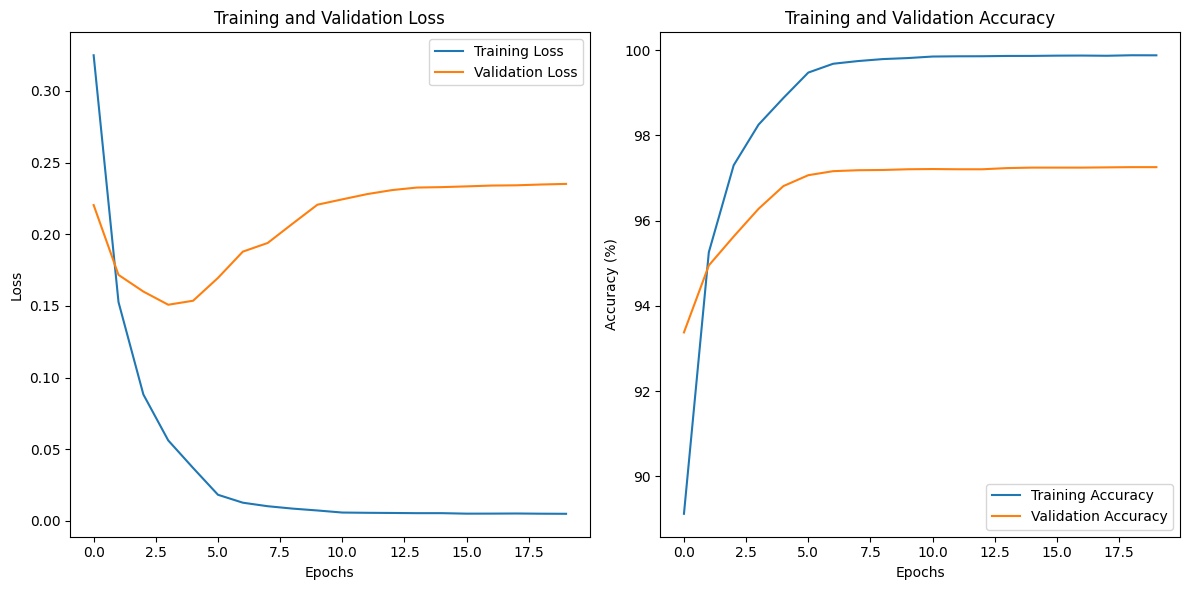

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

## Evaluation Matrix

Accuracy: 0.9736
Precision: 0.9736
Recall: 0.9736
F1 Score: 0.9736


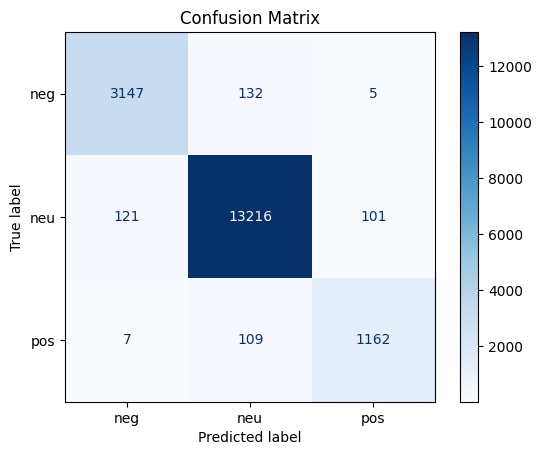

In [ ]:
# Evaluate the model on the test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        hidden_seq, outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Analysis(Pros & Cons)

The change of the previous LSTM model

Analyse the performance of customised model

# **Hyperparameter Tuning**

Experimentation with various combinations of the hyperpatameters

## learning rate to 0.001

batch_size = 64, num_hid = 256, num_out = 3, num_layers = 4,
learning rate = 0.001, num_epochs = 10:

In [ ]:
# Model parameters
num_hid = 256
num_out = 3
learning_rate = 0.001
num_epochs = 10

# Instantiate model, loss function, and optimizer
model = LSTM_model(embedding_matrix, num_hid, num_out, num_layers=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")


Epoch [1/10], Train Loss: 0.7118, Val Loss: 0.6363, Train Acc: 74.95, Val Acc: 73.86
Epoch [2/10], Train Loss: 0.3244, Val Loss: 0.2378, Train Acc: 89.36, Val Acc: 92.67
Epoch [3/10], Train Loss: 0.1589, Val Loss: 0.1768, Train Acc: 95.21, Val Acc: 94.87
Epoch [4/10], Train Loss: 0.0870, Val Loss: 0.1613, Train Acc: 97.45, Val Acc: 95.61
Epoch [5/10], Train Loss: 0.0515, Val Loss: 0.1538, Train Acc: 98.50, Val Acc: 96.25
Epoch [6/10], Train Loss: 0.0317, Val Loss: 0.1636, Train Acc: 99.07, Val Acc: 96.63
Epoch [7/10], Train Loss: 0.0209, Val Loss: 0.1579, Train Acc: 99.40, Val Acc: 96.82
Epoch [8/10], Train Loss: 0.0154, Val Loss: 0.1840, Train Acc: 99.54, Val Acc: 96.99
Epoch [9/10], Train Loss: 0.0115, Val Loss: 0.1714, Train Acc: 99.67, Val Acc: 97.07
Epoch [10/10], Train Loss: 0.0099, Val Loss: 0.1770, Train Acc: 99.72, Val Acc: 97.03
Training complete


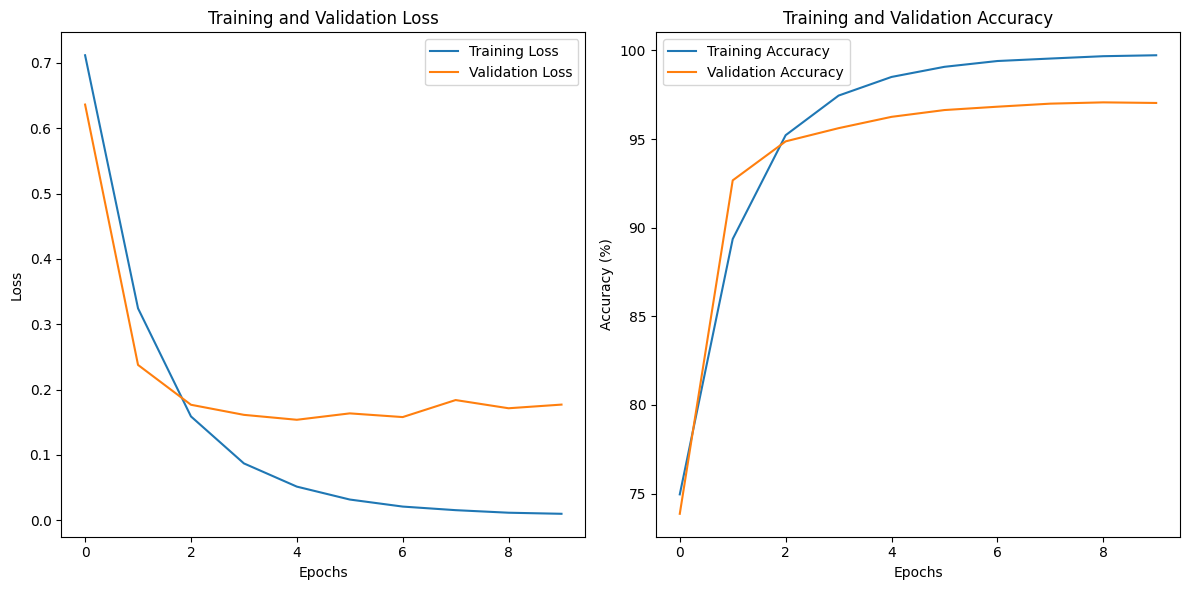

In [ ]:

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

Accuracy: 0.9708
Precision: 0.9708
Recall: 0.9708
F1 Score: 0.9708


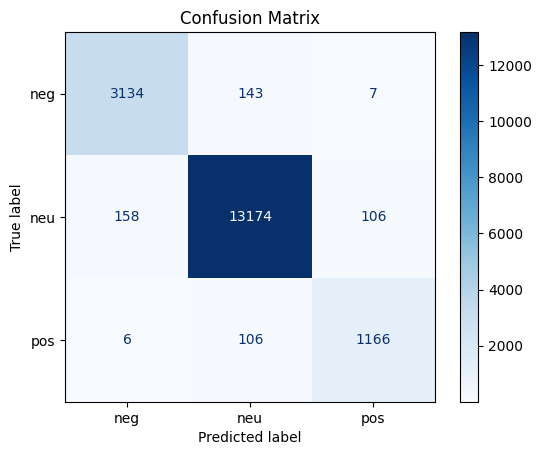

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Make predictions
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Tuning the num_hid

batch_size = 32, num_hid = 128, num_out = 3, num_layers = 4,
dropout_porb = 0.2, learning rate = 0.0015, num_epochs = 10:


In [ ]:
# The best Model parameters settings
batch_size = 64
num_input = max_length
embedding_dim = 100
num_hid = 128
num_out = 3
num_layers = 4
dropout_prob = 0.2
learning_rate = 0.0015
num_epochs = 10

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

# Evaluate the model on the test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        hidden_seq, outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

## Tuning the batch_size

batch_size = 32, num_hid = 256, num_out = 3, num_layers = 4,
dropout_porb = 0.2, learning rate = 0.0015, num_epochs = 20:


In [ ]:
# The best Model parameters settings
batch_size = 32
num_input = max_length
embedding_dim = 100
num_hid = 256
num_out = 3
num_layers = 4
dropout_prob = 0.2
learning_rate = 0.0015
num_epochs = 20

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

# Evaluate the model on the test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        hidden_seq, outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

## Tuning the number of epoch

batch_size = 64, num_hid = 256, num_out = 3, num_layers = 4,
dropout_porb = 0.2, learning rate = 0.0015, num_epochs = 20:

**Get the highest result: Accuracy = 0.9736, Precision = 0.9736, Recall = 0.9736, F1 Score = 0.9736.**

In [ ]:
# The best Model parameters settings
num_input = max_length
embedding_dim = 100
num_hid = 256
num_out = 3
num_layers = 4
dropout_prob = 0.2
learning_rate = 0.0015
num_epochs = 20

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

# Evaluate the model on the test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        hidden_seq, outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

## Another Optimiser

RMSprop (Root Mean Square Propagation):

*   Pros: Keeps a moving average of the squared gradients and adapts the learning rate for each parameter, making it suitable for recurrent neural networks (RNNs) like LSTMs.
*   Cons: May not generalize as well as Adam in some cases.
*   Recommendation: RMSprop is particularly effective for models with recurrent components, so it’s worth trying.



AdamW (Adam with Weight Decay):

*   Pros: Decouples weight decay from the gradient updates, which can help in better regularization and generalization.
*   Cons: Slightly more computational overhead compared to Adam.
*   Recommendation: Useful if regularization is a concern. It’s known to work well with LSTMs and transformers.

The results show the performance of these optimizers are similar.







### **RMSprop**

In [ ]:
# The best Model parameters settings
num_input = max_length
embedding_dim = 100
num_hid = 256
num_out = 3
num_layers = 4
dropout_prob = 0.2
learning_rate = 0.0015
num_epochs = 20

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.RMSprop(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

# Evaluate the model on the test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        hidden_seq, outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Epoch [1/20], Train Loss: 0.3192, Val Loss: 0.2345, Train Acc: 89.59, Val Acc: 92.54
Epoch [2/20], Train Loss: 0.1707, Val Loss: 0.1920, Train Acc: 94.70, Val Acc: 94.19
Epoch [3/20], Train Loss: 0.1159, Val Loss: 0.1811, Train Acc: 96.53, Val Acc: 94.61
Epoch [4/20], Train Loss: 0.0835, Val Loss: 0.1879, Train Acc: 97.48, Val Acc: 94.84
Epoch [5/20], Train Loss: 0.0610, Val Loss: 0.1751, Train Acc: 98.18, Val Acc: 95.45
Epoch [6/20], Train Loss: 0.0313, Val Loss: 0.1942, Train Acc: 99.11, Val Acc: 95.51
Epoch [7/20], Train Loss: 0.0255, Val Loss: 0.2084, Train Acc: 99.29, Val Acc: 95.48
Epoch [8/20], Train Loss: 0.0221, Val Loss: 0.2135, Train Acc: 99.41, Val Acc: 95.71
Epoch [9/20], Train Loss: 0.0192, Val Loss: 0.2200, Train Acc: 99.49, Val Acc: 95.72
Epoch [10/20], Train Loss: 0.0170, Val Loss: 0.2263, Train Acc: 99.57, Val Acc: 95.77
Epoch [11/20], Train Loss: 0.0140, Val Loss: 0.2336, Train Acc: 99.65, Val Acc: 95.71
Epoch [12/20], Train Loss: 0.0141, Val Loss: 0.2349, Train Acc:

### **AdamW**

In [ ]:
# The best Model parameters settings
num_input = max_length
embedding_dim = 100
num_hid = 256
num_out = 3
num_layers = 4
dropout_prob = 0.2
learning_rate = 0.0015
num_epochs = 20

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.AdamW(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

# Evaluate the model on the test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        hidden_seq, outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Epoch [1/20], Train Loss: 0.3249, Val Loss: 0.2207, Train Acc: 89.23, Val Acc: 93.17
Epoch [2/20], Train Loss: 0.1561, Val Loss: 0.1661, Train Acc: 95.16, Val Acc: 94.98
Epoch [3/20], Train Loss: 0.0932, Val Loss: 0.1515, Train Acc: 97.12, Val Acc: 95.83
Epoch [4/20], Train Loss: 0.0590, Val Loss: 0.1472, Train Acc: 98.16, Val Acc: 96.29
Epoch [5/20], Train Loss: 0.0400, Val Loss: 0.1502, Train Acc: 98.78, Val Acc: 96.51
Epoch [6/20], Train Loss: 0.0194, Val Loss: 0.1705, Train Acc: 99.46, Val Acc: 96.82
Epoch [7/20], Train Loss: 0.0137, Val Loss: 0.1799, Train Acc: 99.64, Val Acc: 96.97
Epoch [8/20], Train Loss: 0.0107, Val Loss: 0.2041, Train Acc: 99.73, Val Acc: 97.13
Epoch [9/20], Train Loss: 0.0089, Val Loss: 0.2069, Train Acc: 99.77, Val Acc: 97.19
Epoch [10/20], Train Loss: 0.0073, Val Loss: 0.2229, Train Acc: 99.81, Val Acc: 97.28
Epoch [11/20], Train Loss: 0.0059, Val Loss: 0.2244, Train Acc: 99.85, Val Acc: 97.23
Epoch [12/20], Train Loss: 0.0057, Val Loss: 0.2264, Train Acc:

# **My Tuning Summary/Analysis**
(compare the fine-tuning and hyperparameters tuning)

1.
batch_size = 64, num_hid = 256, num_out = 3, num_layers = 4,
dropout_porb = 0.5, learning rate = 0.0015, num_epochs = 10:

Result: Accuracy = 0.9706, Precision = 0.9705, Recall = 0.9706, F1 Score = 0.9705.

2.
batch_size = 32, num_hid = 256, num_out = 3, num_layers = 4,
dropout_porb = 0.5, learning rate = 0.0015, num_epochs = 10:

Result: Accuracy = 0.9708, Precision = 0.9707, Recall = 0.9708, F1 Score = 0.9707.

3.
batch_size = 32, num_hid = 128, num_out = 3, num_layers = 4,
dropout_porb = 0.5, learning rate = 0.0015, num_epochs = 10:

Result: Accuracy = 0.9686, Precision = 0.9686, Recall = 0.9686, F1 Score = 0.9686.

4.
batch_size = 64, num_hid = 256, num_out = 3, num_layers = 4,
dropout_porb = 0.3, learning rate = 0.0015, num_epochs = 10:

Result: Accuracy = 0.9721, Precision = 0.9719, Recall = 0.9721, F1 Score = 0.9720.

**5.batch_size = 64, num_hid = 256, num_out = 3, num_layers = 4,
dropout_porb = 0.2, learning rate = 0.0015, num_epochs = 20**

**Result: Accuracy = 0.9736, Precision = 0.9736, Recall = 0.9736, F1 Score = 0.9736.**

**Model 7 performed the best.**







# **Compare Different Embeddings**

## Word2Vec Embedding

### step 1: install gensim

In [ ]:
!pip install gensim

In [ ]:
import gensim.downloader as api

# Load pre-trained Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")  # or your desired model
embedding_dim = 300  # Dimension of the Word2Vec embeddings

### step 2: implementing Word2Vec embedding

In [ ]:
import numpy as np
import torch

# Assuming tokenizer is already fitted
word_index = tokenizer.word_index

# Create embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    if word in word2vec_model:
        embedding_vector = word2vec_model[word]
        embedding_matrix[i] = embedding_vector

# Convert to PyTorch tensor
embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float32)

### step 3: train with the best set of hyperparameter

In [ ]:
import torch
import torch.nn as nn
import math

class CustomLSTMWithAttention(nn.Module):
    def __init__(self, num_input, num_hid, num_out, batch_size=1, num_layers=1, dropout_prob=0.2, embedding_matrix=None):
        super(CustomLSTMWithAttention, self).__init__()
        self.num_hid = num_hid
        self.batch_size = batch_size
        self.num_layers = num_layers

        # Add embedding layer
        if embedding_matrix is not None:
            self.embedding = nn.Embedding.from_pretrained(embedding_matrix)
        else:
            self.embedding = nn.Embedding(num_input, embedding_dim)

        self.W = nn.Parameter(torch.Tensor(embedding_dim, num_hid * 4))
        self.U = nn.Parameter(torch.Tensor(num_hid, num_hid * 4))
        self.hid_bias = nn.Parameter(torch.Tensor(num_hid * 4))
        self.V = nn.Parameter(torch.Tensor(num_hid, num_out))
        self.out_bias = nn.Parameter(torch.Tensor(num_out))
        self.dropout = nn.Dropout(dropout_prob)
        self.attention = AttentionLayer(num_hid)
        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.num_hid)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def init_hidden(self):
        return (torch.zeros(self.num_layers, self.batch_size, self.num_hid),
                torch.zeros(self.num_layers, self.batch_size, self.num_hid))

    def forward(self, x, init_states=None):
        x = self.embedding(x)
        batch_size, seq_size, _ = x.size()
        hidden_seq = []
        if init_states is None:
            h_t, c_t = (torch.zeros(batch_size, self.num_hid).to(x.device),
                        torch.zeros(batch_size, self.num_hid).to(x.device))
        else:
            h_t, c_t = init_states

        NH = self.num_hid
        for t in range(seq_size):
            x_t = x[:, t, :]
            gates = x_t @ self.W + h_t @ self.U + self.hid_bias
            i_t, f_t, g_t, o_t = (
                torch.sigmoid(gates[:, :NH]),     # input gate
                torch.sigmoid(gates[:, NH:NH*2]), # forget gate
                torch.tanh(gates[:, NH*2:NH*3]),  # new values
                torch.sigmoid(gates[:, NH*3:]),   # output gate
            )
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            # Apply dropout
            h_t = self.dropout(h_t)
            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()

        # Apply attention
        context_vector = self.attention(hidden_seq)

        output = context_vector @ self.V + self.out_bias
        return hidden_seq, output

Epoch [1/20], Train Loss: 0.5868, Val Loss: 0.5237, Train Acc: 0.7926, Val Acc: 0.8214
Epoch [2/20], Train Loss: 0.4636, Val Loss: 0.4433, Train Acc: 0.8444, Val Acc: 0.8563
Epoch [3/20], Train Loss: 0.4052, Val Loss: 0.4004, Train Acc: 0.8683, Val Acc: 0.8714
Epoch [4/20], Train Loss: 0.3664, Val Loss: 0.3666, Train Acc: 0.8808, Val Acc: 0.8818
Epoch [5/20], Train Loss: 0.3265, Val Loss: 0.3409, Train Acc: 0.8943, Val Acc: 0.8917
Epoch [6/20], Train Loss: 0.2868, Val Loss: 0.3100, Train Acc: 0.9075, Val Acc: 0.9018
Epoch [7/20], Train Loss: 0.2498, Val Loss: 0.2949, Train Acc: 0.9198, Val Acc: 0.9091
Epoch [8/20], Train Loss: 0.2164, Val Loss: 0.2727, Train Acc: 0.9311, Val Acc: 0.9179
Epoch [9/20], Train Loss: 0.1884, Val Loss: 0.2526, Train Acc: 0.9394, Val Acc: 0.9252
Epoch [10/20], Train Loss: 0.1619, Val Loss: 0.2460, Train Acc: 0.9482, Val Acc: 0.9301
Epoch [11/20], Train Loss: 0.1390, Val Loss: 0.2200, Train Acc: 0.9547, Val Acc: 0.9389
Epoch [12/20], Train Loss: 0.1200, Val Lo

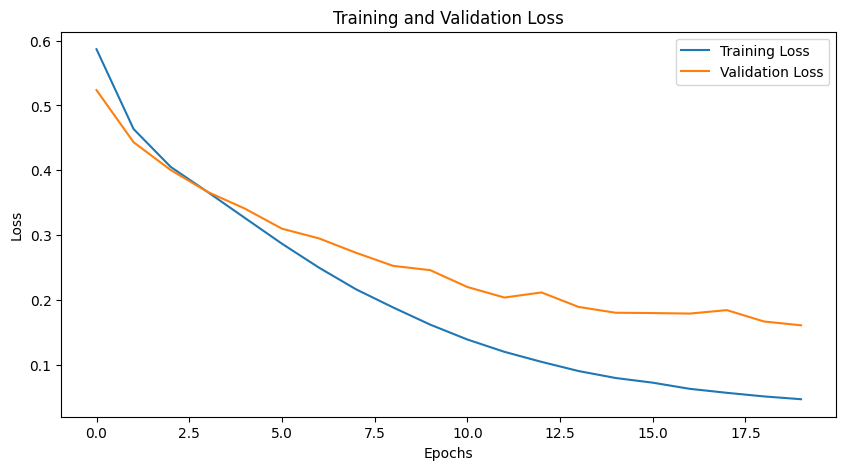

In [ ]:
# Parameters
num_input = len(word_index) + 1  # Vocabulary size
embedding_dim = 300  # Dimension of embeddings
num_hid = 256  # Number of hidden units
num_out = 3  # Number of output classes
num_layers = 4  # Number of LSTM layers
dropout_prob = 0.2  # Dropout probability
learning_rate = 0.0015  # Learning rate
num_epochs = 20  # Number of epochs

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(num_input=num_input, num_hid=num_hid, num_out=num_out, num_layers=num_layers, dropout_prob=dropout_prob, embedding_matrix=embedding_matrix)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Define lists to store loss and accuracy
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0

    for sequences, labels in train_loader:
        optimizer.zero_grad()
        hidden_seq, output = model(sequences)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        _, predicted = torch.max(output, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracy = correct_train / total_train
    train_accuracies.append(train_accuracy)

    # Validation loop
    model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for sequences, labels in val_loader:
            hidden_seq, output = model(sequences)
            loss = criterion(output, labels)
            total_val_loss += loss.item()

            _, predicted = torch.max(output, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    val_accuracy = correct_val / total_val
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, '
          f'Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

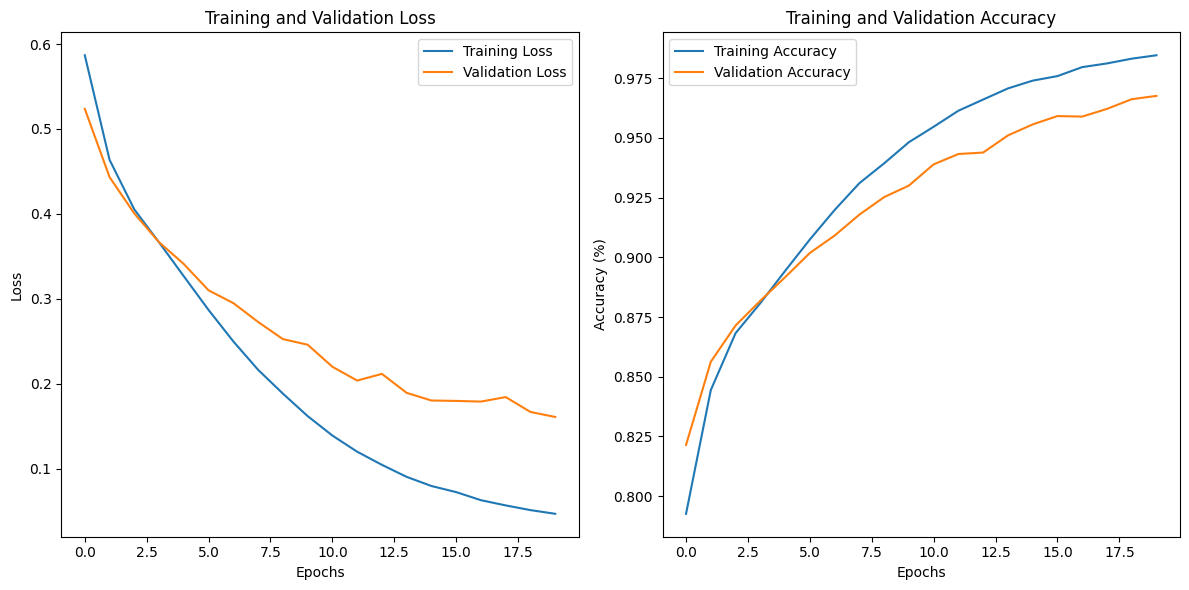

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

Test Results:
Loss: 0.1476
Accuracy: 0.9689
Precision: 0.9687
Recall: 0.9689
F1 Score: 0.9687


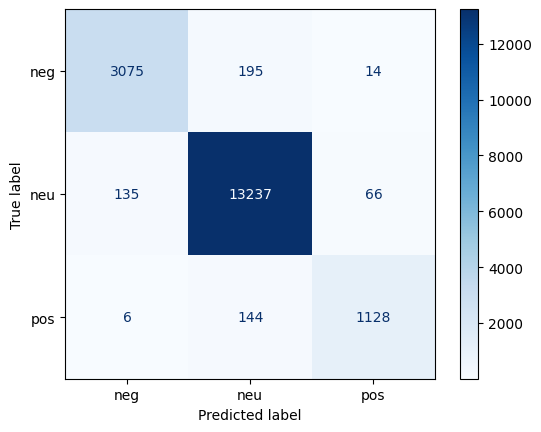

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, data_loader, criterion):
    model.eval()
    all_labels = []
    all_predictions = []
    total_loss = 0

    with torch.no_grad():
        for sequences, labels in data_loader:
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')

    return avg_loss, accuracy, precision, recall, f1, all_labels, all_predictions

def plot_confusion_matrix(labels, predictions, classes):
    cm = confusion_matrix(labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()


# Evaluate on test data
test_loss, test_accuracy, test_precision, test_recall, test_f1, test_labels, test_predictions = evaluate_model(model, test_loader, criterion)

print('Test Results:')
print(f'Loss: {test_loss:.4f}')
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')

# Plot confusion matrix
classes = label_encoder.classes_
plot_confusion_matrix(test_labels, test_predictions, classes)

## Comparison Summary

Compare the GloVe and Word2Vec (After finishing hyperparameters)
(using same set of hyperparamters, which is the best set as I experimented)

The outputs show that the Glove gives the better results.

# Training on New Dataset:

## Same preprocess

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/Re-COVIDSenti.csv'
url_A = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/Re-COVIDSenti_A.csv'
url_B = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/Re-COVIDSenti_B.csv'
url_C = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/Re-COVIDSenti_C.csv'

original_df = pd.read_csv(url)
original_df_A = pd.read_csv(url_A)
original_df_B = pd.read_csv(url_B)
original_df_C = pd.read_csv(url_C)

# Preparing / Initialization for preprocessed dataset
df = pd.read_csv(url)
df_A = pd.read_csv(url_A)
df_B = pd.read_csv(url_B)
df_C = pd.read_csv(url_C)

print(original_df.info())
print(original_df['pred_label'].value_counts())
print(original_df.head())

print("-------------------------------------------------------------------------")
print(original_df_A.info())
print(original_df_A['pred_label'].value_counts())
print(original_df_A.head())

print("-------------------------------------------------------------------------")
print(original_df_B.info())
print(original_df_B['pred_label'].value_counts())
print(original_df_B.head())

print("-------------------------------------------------------------------------")
print(original_df_C.info())
print(original_df_C['pred_label'].value_counts())
print(original_df_C.head())

# @title #### 3.4.1 **Lowercase Conversion**:
df['tweet'] = original_df['tweet'].str.lower()
df_A['tweet'] = original_df_A['tweet'].str.lower()
df_B['tweet'] = original_df_B['tweet'].str.lower()
df_C['tweet'] = original_df_C['tweet'].str.lower()
print(original_df.iloc[0, 0])
print(df.iloc[0, 0])


# @title #### 3.4.2 **Removing URLs**:
def remove_urls(text):
    # Match URLs starting with "http://", "https://", or "www.".
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['tweet'] = df['tweet'].apply(lambda x: remove_urls(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_urls(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_urls(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_urls(x))
print(original_df.iloc[0, 0])
print(df.iloc[0, 0])

# @title #### 3.4.3 **Removing mentions and hashtags**:
def remove_mentions_hashtags(text):
    mention_pattern = re.compile(r'@\w+')
    hashtag_pattern = re.compile(r'#\w+')
    text = mention_pattern.sub(r'', text)
    text = hashtag_pattern.sub(r'', text)
    return text

df['tweet'] = df['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_mentions_hashtags(x))
print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])


# @title #### 3.4.4 Remove special characters and punctuation
def remove_special_characters(text):
    special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')
    text = special_char_pattern.sub(r'', text)
    return text

df['tweet'] = df['tweet'].apply(lambda x: remove_special_characters(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_special_characters(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_special_characters(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_special_characters(x))

print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])


# @title #### 3.4.5 Removing Stop Words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download the stop words corpus

# Remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

df['tweet'] = df['tweet'].apply(remove_stopwords)
df_A['tweet'] = df_A['tweet'].apply(remove_stopwords)
df_B['tweet'] = df_B['tweet'].apply(remove_stopwords)
df_C['tweet'] = df_C['tweet'].apply(remove_stopwords)

print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize the texts
df['tweet'] = df['tweet'].apply(lambda x: word_tokenize(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: word_tokenize(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: word_tokenize(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: word_tokenize(x))

print(df['tweet'].head())

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import Dataset, DataLoader
import torch


# Combine all datasets into one list of tokenized texts
all_texts = df['tweet'].tolist() + df_A['tweet'].tolist() + df_B['tweet'].tolist() + df_C['tweet'].tolist()

# Create and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([' '.join(text) for text in all_texts])

# Convert the tokenized texts to sequences of integers
df['tweet'] = df['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_A['tweet'] = df_A['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_B['tweet'] = df_B['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_C['tweet'] = df_C['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])

max_length = max(max(len(seq) for seq in df['tweet']),
                 max(len(seq) for seq in df_A['tweet']),
                 max(len(seq) for seq in df_B['tweet']),
                 max(len(seq) for seq in df_C['tweet']))

# Pad the sequences
df['tweet'] = pad_sequences(df['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_A['tweet'] = pad_sequences(df_A['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_B['tweet'] = pad_sequences(df_B['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_C['tweet'] = pad_sequences(df_C['tweet'].tolist(), maxlen=max_length, padding='post').tolist()

print(df['tweet'].head())
# Verify the result by mapping back to words
i = 0  # Example index
tokenized_sequence = df.iloc[i, 0]
mapped_words = [tokenizer.index_word[token] for token in tokenized_sequence if token != 0]
print(f"Original Text {i}: {' '.join(all_texts[i])}")
print(f"Tokenized Sequence {i}: {tokenized_sequence}")
print(f"Mapped Words {i}: {' '.join(mapped_words)}")


import numpy as np

# Load GloVe embeddings
embedding_index = {}
with open("drive/MyDrive/Jialiang/9444/COVID19/glove/glove.6B.100d.txt", "r", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coefs

# Create embedding matrix
embedding_dim = 100  # Size of GloVe embeddings
word_index = tokenizer.word_index  # Assuming tokenizer is already fitted
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Convert to PyTorch tensor
embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float32)

from sklearn.model_selection import train_test_split

# Combine all data into a single DataFrame
all_data = pd.concat([df, df_A, df_B, df_C], ignore_index=True)

# Prepare labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
all_data['pred_label'] = label_encoder.fit_transform(all_data['pred_label'])
labels = all_data['pred_label'].values

# Convert sequences to numpy array
sequences = np.array(all_data['tweet'].tolist())

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(sequences, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.tensor(self.sequences[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

# Create datasets
train_dataset = TextDataset(X_train, y_train)
val_dataset = TextDataset(X_val, y_val)
test_dataset = TextDataset(X_test, y_test)

# batch_size = 32
batch_size = 64

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

import torch
import torch.nn as nn
import torch.optim as optim
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# add attention layer to imorove the performance
class AttentionLayer(nn.Module):
    def __init__(self, num_hid):
        super(AttentionLayer, self).__init__()
        self.att_weight = nn.Parameter(torch.Tensor(num_hid, 1))
        self.att_bias = nn.Parameter(torch.Tensor(1))

    def forward(self, hidden_seq):
        attn_scores = torch.tanh(hidden_seq @ self.att_weight + self.att_bias)
        attn_weights = torch.softmax(attn_scores, dim=1)
        context_vector = attn_weights * hidden_seq
        context_vector = torch.sum(context_vector, dim=1)
        return context_vector

class CustomLSTMWithAttention(nn.Module):
    def __init__(self, num_input, num_hid, num_out, batch_size=1, num_layers=1, dropout_prob=0.5, embedding_dim=100):
        super(CustomLSTMWithAttention, self).__init__()
        self.num_hid = num_hid
        self.batch_size = batch_size
        self.num_layers = num_layers
        # Add embedding layer
        self.embedding = nn.Embedding(num_input, embedding_dim)

        self.W = nn.Parameter(torch.Tensor(embedding_dim, num_hid * 4))
        self.U = nn.Parameter(torch.Tensor(num_hid, num_hid * 4))
        self.hid_bias = nn.Parameter(torch.Tensor(num_hid * 4))
        self.V = nn.Parameter(torch.Tensor(num_hid, num_out))
        self.out_bias = nn.Parameter(torch.Tensor(num_out))
        self.dropout = nn.Dropout(dropout_prob)
        self.attention = AttentionLayer(num_hid)
        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.num_hid)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def init_hidden(self):
        return (torch.zeros(self.num_layers, self.batch_size, self.num_hid),
                torch.zeros(self.num_layers, self.batch_size, self.num_hid))

    def forward(self, x, init_states=None):
        x = self.embedding(x)
        batch_size, seq_size, _ = x.size()
        hidden_seq = []
        if init_states is None:
            h_t, c_t = (torch.zeros(batch_size, self.num_hid).to(x.device),
                        torch.zeros(batch_size, self.num_hid).to(x.device))
        else:
            h_t, c_t = init_states

        NH = self.num_hid
        for t in range(seq_size):
            x_t = x[:, t, :]
            gates = x_t @ self.W + h_t @ self.U + self.hid_bias
            i_t, f_t, g_t, o_t = (
                torch.sigmoid(gates[:, :NH]),     # input gate
                torch.sigmoid(gates[:, NH:NH*2]), # forget gate
                torch.tanh(gates[:, NH*2:NH*3]),  # new values
                torch.sigmoid(gates[:, NH*3:]),   # output gate
            )
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            # Apply dropout
            h_t = self.dropout(h_t)
            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()

        # Apply attention
        context_vector = self.attention(hidden_seq)

        output = context_vector @ self.V + self.out_bias
        return hidden_seq, output
# The best Model parameters settings
num_input = max_length
embedding_dim = 100
num_hid = 256
num_out = 3
num_layers = 4
dropout_prob = 0.2
learning_rate = 0.0015
num_epochs = 20

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

## With stop words

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/Re-COVIDSenti.csv'
url_A = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/Re-COVIDSenti_A.csv'
url_B = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/Re-COVIDSenti_B.csv'
url_C = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/Re-COVIDSenti_C.csv'

original_df = pd.read_csv(url)
original_df_A = pd.read_csv(url_A)
original_df_B = pd.read_csv(url_B)
original_df_C = pd.read_csv(url_C)

# Preparing / Initialization for preprocessed dataset
df = pd.read_csv(url)
df_A = pd.read_csv(url_A)
df_B = pd.read_csv(url_B)
df_C = pd.read_csv(url_C)

print(original_df.info())
print(original_df['pred_label'].value_counts())
print(original_df.head())

print("-------------------------------------------------------------------------")
print(original_df_A.info())
print(original_df_A['pred_label'].value_counts())
print(original_df_A.head())

print("-------------------------------------------------------------------------")
print(original_df_B.info())
print(original_df_B['pred_label'].value_counts())
print(original_df_B.head())

print("-------------------------------------------------------------------------")
print(original_df_C.info())
print(original_df_C['pred_label'].value_counts())
print(original_df_C.head())

# @title #### 3.4.1 **Lowercase Conversion**:
df['tweet'] = original_df['tweet'].str.lower()
df_A['tweet'] = original_df_A['tweet'].str.lower()
df_B['tweet'] = original_df_B['tweet'].str.lower()
df_C['tweet'] = original_df_C['tweet'].str.lower()
print(original_df.iloc[0, 0])
print(df.iloc[0, 0])


# @title #### 3.4.2 **Removing URLs**:
def remove_urls(text):
    # Match URLs starting with "http://", "https://", or "www.".
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['tweet'] = df['tweet'].apply(lambda x: remove_urls(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_urls(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_urls(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_urls(x))
print(original_df.iloc[0, 0])
print(df.iloc[0, 0])

# @title #### 3.4.3 **Removing mentions and hashtags**:
def remove_mentions_hashtags(text):
    mention_pattern = re.compile(r'@\w+')
    hashtag_pattern = re.compile(r'#\w+')
    text = mention_pattern.sub(r'', text)
    text = hashtag_pattern.sub(r'', text)
    return text

df['tweet'] = df['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_mentions_hashtags(x))
print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])


# @title #### 3.4.4 Remove special characters and punctuation
def remove_special_characters(text):
    special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')
    text = special_char_pattern.sub(r'', text)
    return text

df['tweet'] = df['tweet'].apply(lambda x: remove_special_characters(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_special_characters(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_special_characters(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_special_characters(x))

print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])



import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize the texts
df['tweet'] = df['tweet'].apply(lambda x: word_tokenize(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: word_tokenize(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: word_tokenize(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: word_tokenize(x))

print(df['tweet'].head())

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import Dataset, DataLoader
import torch


# Combine all datasets into one list of tokenized texts
all_texts = df['tweet'].tolist() + df_A['tweet'].tolist() + df_B['tweet'].tolist() + df_C['tweet'].tolist()

# Create and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([' '.join(text) for text in all_texts])

# Convert the tokenized texts to sequences of integers
df['tweet'] = df['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_A['tweet'] = df_A['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_B['tweet'] = df_B['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_C['tweet'] = df_C['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])

max_length = max(max(len(seq) for seq in df['tweet']),
                 max(len(seq) for seq in df_A['tweet']),
                 max(len(seq) for seq in df_B['tweet']),
                 max(len(seq) for seq in df_C['tweet']))

# Pad the sequences
df['tweet'] = pad_sequences(df['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_A['tweet'] = pad_sequences(df_A['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_B['tweet'] = pad_sequences(df_B['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_C['tweet'] = pad_sequences(df_C['tweet'].tolist(), maxlen=max_length, padding='post').tolist()

print(df['tweet'].head())
# Verify the result by mapping back to words
i = 0  # Example index
tokenized_sequence = df.iloc[i, 0]
mapped_words = [tokenizer.index_word[token] for token in tokenized_sequence if token != 0]
print(f"Original Text {i}: {' '.join(all_texts[i])}")
print(f"Tokenized Sequence {i}: {tokenized_sequence}")
print(f"Mapped Words {i}: {' '.join(mapped_words)}")


import numpy as np

# Load GloVe embeddings
embedding_index = {}
with open("drive/MyDrive/Jialiang/9444/COVID19/glove/glove.6B.100d.txt", "r", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coefs

# Create embedding matrix
embedding_dim = 100  # Size of GloVe embeddings
word_index = tokenizer.word_index  # Assuming tokenizer is already fitted
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Convert to PyTorch tensor
embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float32)

from sklearn.model_selection import train_test_split

# Combine all data into a single DataFrame
all_data = pd.concat([df, df_A, df_B, df_C], ignore_index=True)

# Prepare labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
all_data['pred_label'] = label_encoder.fit_transform(all_data['pred_label'])
labels = all_data['pred_label'].values

# Convert sequences to numpy array
sequences = np.array(all_data['tweet'].tolist())

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(sequences, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.tensor(self.sequences[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

# Create datasets
train_dataset = TextDataset(X_train, y_train)
val_dataset = TextDataset(X_val, y_val)
test_dataset = TextDataset(X_test, y_test)

# batch_size = 32
batch_size = 64

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

import torch
import torch.nn as nn
import torch.optim as optim
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# add attention layer to imorove the performance
class AttentionLayer(nn.Module):
    def __init__(self, num_hid):
        super(AttentionLayer, self).__init__()
        self.att_weight = nn.Parameter(torch.Tensor(num_hid, 1))
        self.att_bias = nn.Parameter(torch.Tensor(1))

    def forward(self, hidden_seq):
        attn_scores = torch.tanh(hidden_seq @ self.att_weight + self.att_bias)
        attn_weights = torch.softmax(attn_scores, dim=1)
        context_vector = attn_weights * hidden_seq
        context_vector = torch.sum(context_vector, dim=1)
        return context_vector

class CustomLSTMWithAttention(nn.Module):
    def __init__(self, num_input, num_hid, num_out, batch_size=1, num_layers=1, dropout_prob=0.5, embedding_dim=100):
        super(CustomLSTMWithAttention, self).__init__()
        self.num_hid = num_hid
        self.batch_size = batch_size
        self.num_layers = num_layers
        # Add embedding layer
        self.embedding = nn.Embedding(num_input, embedding_dim)

        self.W = nn.Parameter(torch.Tensor(embedding_dim, num_hid * 4))
        self.U = nn.Parameter(torch.Tensor(num_hid, num_hid * 4))
        self.hid_bias = nn.Parameter(torch.Tensor(num_hid * 4))
        self.V = nn.Parameter(torch.Tensor(num_hid, num_out))
        self.out_bias = nn.Parameter(torch.Tensor(num_out))
        self.dropout = nn.Dropout(dropout_prob)
        self.attention = AttentionLayer(num_hid)
        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.num_hid)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def init_hidden(self):
        return (torch.zeros(self.num_layers, self.batch_size, self.num_hid),
                torch.zeros(self.num_layers, self.batch_size, self.num_hid))

    def forward(self, x, init_states=None):
        x = self.embedding(x)
        batch_size, seq_size, _ = x.size()
        hidden_seq = []
        if init_states is None:
            h_t, c_t = (torch.zeros(batch_size, self.num_hid).to(x.device),
                        torch.zeros(batch_size, self.num_hid).to(x.device))
        else:
            h_t, c_t = init_states

        NH = self.num_hid
        for t in range(seq_size):
            x_t = x[:, t, :]
            gates = x_t @ self.W + h_t @ self.U + self.hid_bias
            i_t, f_t, g_t, o_t = (
                torch.sigmoid(gates[:, :NH]),     # input gate
                torch.sigmoid(gates[:, NH:NH*2]), # forget gate
                torch.tanh(gates[:, NH*2:NH*3]),  # new values
                torch.sigmoid(gates[:, NH*3:]),   # output gate
            )
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            # Apply dropout
            h_t = self.dropout(h_t)
            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()

        # Apply attention
        context_vector = self.attention(hidden_seq)

        output = context_vector @ self.V + self.out_bias
        return hidden_seq, output
# The best Model parameters settings
num_input = max_length
embedding_dim = 100
num_hid = 256
num_out = 3
num_layers = 4
dropout_prob = 0.2
learning_rate = 0.0015
num_epochs = 20

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")